# Model building 
Here we will built our model. 

In [1]:
#importing main data analysis libraries  
import pandas as pd 
import numpy as np
#importing main visualization libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline 

# Plan

1. Realize what problem do we solve

2. Choose models for solving this problem

3. Teach models

	1. Random Forest Classifier

	2. SVC

	3. SGD
    
    4. Gradient Boosting Classification

	5. KNeightbors

4. Check their performance

5. Which errors models did

6. Choose top 3 performance models

7. Per model:
	
	1. Write parameters of the model and what they mean
	
	2. Use GridSearch and RandomizedSearchCV
 

Realize what problem do we solve

We will solve binary classification problem. Our goal to built model, which predict promotion of employees.

For this problem we have several models, but I think we will stop on Random Forest Classifier, SVC, SGD, Gradient Boosting Classification and K-Neighbors Classifier. Firstly we will teach them, check their performance. After this we will look which errors they did, choose 3 models and tune them. Also we will try ensemble models, like voting, they can have better performance than single models.

In [2]:
#read prepared train data
train = pd.read_csv('C:/Users/Asus/Education/Portfolio_Projects/hr_promote_analysis/prepared_train')

In [3]:
#split our dataset into peaces

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train.drop(columns= 'is_promoted', axis = 1), 
    train['is_promoted'], 
    test_size=0.2,
    random_state = 42)

print(' x_train: ',X_train.shape, '\n',
      'y_train:',y_train.shape,'\n',
      'x_test:',X_test.shape,'\n',
      'y_test:',y_test.shape)

 x_train:  (43846, 13) 
 y_train: (43846,) 
 x_test: (10962, 13) 
 y_test: (10962,)


## Teaching models 
Here we will teach the most perspective models, but we only fit them.

### Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

RandomForestClassifier()

### SVC

In [5]:
from sklearn.svm import SVC

sv_clf = SVC()

sv_clf.fit(X_train, y_train)

SVC()

### SGD

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(X_train, y_train)

SGDClassifier()

### XGBoost

In [5]:
from xgboost.sklearn import XGBClassifier

xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### KNeightbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()

kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

## Checking performance
We need to check performance of our model. Our top priorities is high precision and accuracy score. Because it's very important to promote right employee and don't have a mistake. Recall is important too, but 25-30% will be fine. I think, that roc auc score should be about 45-55%. I'm telling about it, because we should choose some model to tune them.

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score


for clf in (rf_clf, sv_clf, sgd_clf, xgb_clf, kn_clf):
    y_pred = clf.predict(X_test)
    print(
        clf.__class__.__name__,
        '\n',
        'Accuracy score: ',accuracy_score(y_test, y_pred), '\n',
        'Precision score: ',precision_score(y_test, y_pred, zero_division = 1), '\n',
        'Recall score: ',recall_score(y_test, y_pred, zero_division = 1), '\n',
        'F1 score: ',f1_score(y_test, y_pred, zero_division = 1), '\n',
        'ROC AUC score: ',roc_auc_score(y_test, y_pred), '\n', 

    )

RandomForestClassifier 
 Accuracy score:  0.9370552818828681 
 Precision score:  0.8263473053892215 
 Recall score:  0.3039647577092511 
 F1 score:  0.4444444444444444 
 ROC AUC score:  0.6490979547448185 

SVC 
 Accuracy score:  0.9171683999270206 
 Precision score:  1.0 
 Recall score:  0.0 
 F1 score:  0.0 
 ROC AUC score:  0.5 

SGDClassifier 
 Accuracy score:  0.9206349206349206 
 Precision score:  0.7794117647058824 
 Recall score:  0.05837004405286344 
 F1 score:  0.10860655737704919 
 ROC AUC score:  0.5284390502738954 

XGBClassifier 
 Accuracy score:  0.9464513774858603 
 Precision score:  0.883054892601432 
 Recall score:  0.40748898678414097 
 F1 score:  0.5576488319517708 
 ROC AUC score:  0.7013076523337853 

KNeighborsClassifier 
 Accuracy score:  0.9135194307608101 
 Precision score:  0.3113207547169811 
 Recall score:  0.03634361233480176 
 F1 score:  0.06508875739644969 
 ROC AUC score:  0.5145414103050575 



So we have all scores of our models. In my opinion we should choose 2 or 3 top model, which we will tune and make better. Here it is Random Forest Classifier and Gradient Boosting Classifier.

## Model Tuning

### Random Forest Classifier

#### Grid Search CV 

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [11]:
rfc_search = RandomForestClassifier()

In [12]:
n_estimators = [32, 64, 128]
max_featurese = ['auto', 'sqrt', 'log2']
max_depth = [20, 25, 30, 35]
min_samples_split = 0.2
min_samples_leaf = [1, 2, 5, 10, 15]

grid_param = {
    'n_estimators': n_estimators,
    'max_features': max_featurese,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

In [13]:
rfc_grid_f = GridSearchCV(estimator= rfc_search, param_grid= grid_param, cv = 5, scoring= 'roc_auc')

In [14]:
rfc_grid_f.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 25, 30, 35],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10, 15],
                         'n_estimators': [32, 64, 128]},
             scoring='roc_auc')

In [15]:
rfc_grid_f.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=10, n_estimators=128)

In [16]:
rfc_grid_f.best_score_

0.9058009699156783

In [6]:
rfc_grid_s =RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=128)


In [7]:
rfc_grid_s.fit(X_train, y_train )

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=128)

In [10]:
y_pred = rfc_grid_s.predict(X_test)
print(
        rfc_grid_s.__class__.__name__,
        '\n',
        'Accuracy score: ',accuracy_score(y_test, y_pred), '\n',
        'Precision score: ',precision_score(y_test, y_pred, zero_division = 1), '\n',
        'Recall score: ',recall_score(y_test, y_pred, zero_division = 1), '\n',
        'F1 score: ',f1_score(y_test, y_pred, zero_division = 1), '\n',
        'ROC AUC score: ',roc_auc_score(y_test, y_pred), '\n', 

    )

RandomForestClassifier 
 Accuracy score:  0.9364167122787812 
 Precision score:  0.9271255060728745 
 Recall score:  0.2522026431718062 
 F1 score:  0.3965367965367966 
 ROC AUC score:  0.6252061554828595 



In [11]:
from joblib import dump, load
dump(rfc_grid_s, 'random_forest_model.joblib') 

['random_forest_model.joblib']

#### Random Search CV 

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
rfc_search_rscv = RandomForestClassifier()

In [22]:
n_estimators = [32, 64, 128,  256]
max_featurese = ['auto', 'sqrt', 'log2']
max_depth = [32, 64, 128, 256]
min_samples_leaf = [1, 2, 5, 10, 15]
criterion = ['entropy', 'gini']
bootstrap = [True, False]

random_param = {
    'n_estimators': n_estimators,
    'max_features': max_featurese,
    'criterion' : criterion,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

In [23]:
rfc_random_f = RandomizedSearchCV(estimator= rfc_search_rscv,
                               param_distributions= random_param,
                               cv = 5, n_jobs= -1, scoring= 'precision')

In [24]:
rfc_random_f.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [32, 64, 128, 256],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'n_estimators': [32, 64, 128, 256]},
                   scoring='precision')

In [25]:
rfc_random_f.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=256, min_samples_leaf=10,
                       n_estimators=256)

In [26]:
rfc_random_s = RandomForestClassifier(criterion='entropy', max_depth=256, max_features='log2',
                       min_samples_leaf=10, n_estimators=64)

In [27]:
rfc_random_s.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=256, max_features='log2',
                       min_samples_leaf=10, n_estimators=64)

In [28]:
y_pred = rfc_random_s.predict(X_test)
print(
        rfc_random_s.__class__.__name__,
        '\n',
        'Accuracy score: ',accuracy_score(y_test, y_pred), '\n',
        'Precision score: ',precision_score(y_test, y_pred, zero_division = 1), '\n',
        'Recall score: ',recall_score(y_test, y_pred, zero_division = 1), '\n',
        'F1 score: ',f1_score(y_test, y_pred, zero_division = 1), '\n',
        'ROC AUC score: ',roc_auc_score(y_test, y_pred), '\n', 

    )

RandomForestClassifier 
 Accuracy score:  0.9357781426746944 
 Precision score:  0.9322033898305084 
 Recall score:  0.2422907488986784 
 F1 score:  0.3846153846153846 
 ROC AUC score:  0.6203496712466338 



### Comparison
Here we will compare all the results.

#### Without tuning:

 Accuracy score:  0.9374201787994891  \
 Precision score:  0.8284023668639053 \
 Recall score:  0.30837004405286345 \
 F1 score:  0.4494382022471911 \
 ROC AUC score:  0.6513005979166246 
 
 #### GridSearch:
 
 Accuracy score:  0.9377850757161103 \
 Precision score:  0.9346153846153846 \
 Recall score:  0.26762114537444937 \
 F1 score:  0.416095890410959 \
 ROC AUC score:  0.6329651380343503 
 
 #### RandomSearch:
 
 Accuracy score:  0.9362342638204707 \
 Precision score:  0.9336099585062241 \
 Recall score:  0.24779735682819384 \
 F1 score:  0.391644908616188 \
 ROC AUC score:  0.6231029752113916 

As we can see most efficient model is GridSearch , we increase our precision score from 82% to 93%, we lost 6% in our recall score, but it's more important to get the most accurate result. We don't want to promote wrong employees. So we will use this, instead without tuning model. So this model we will save.

## Gradient Boosting

### Research

Here we will explore, which parameter we should use. Gradient Boosting is good, but we should optimize our grid search. Thanks for this code for Mohtadi Ben Fraj, it was published on Medium.com(https://medium.com/@mohtedibf)

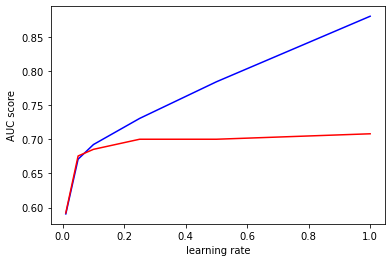

In [61]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []

for eta in learning_rates:
   model = XGBClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(learning_rates, train_results,'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results,'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

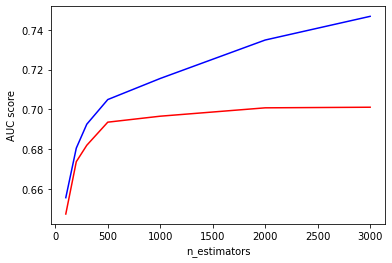

In [30]:
n_estimators = [100, 200, 300, 500, 1000, 2000, 3000]
train_results = []
test_results = []
for estimator in n_estimators:
   model = XGBClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

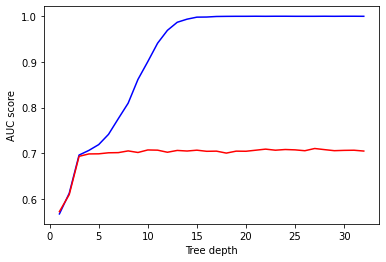

In [65]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   model = XGBClassifier(max_depth=int(max_depth))
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
    
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

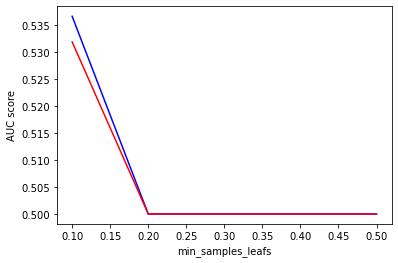

In [33]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = XGBClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

#### Grid Search

In [13]:
xgb_clf_grid = XGBClassifier()

In [81]:
n_estimators = [2000]
learning_rate = [0.35 ,0.25]
max_depth = [5, 7]

grid_param = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
}

In [83]:
xgb_clf_grid_f = GridSearchCV(estimator= xgb_clf_grid,  param_grid= grid_param, cv = 5, scoring= 'roc_auc')

In [84]:
xgb_clf_grid_f.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [85]:
xgb_clf_grid_f.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
xgb_clf_grid_s = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5, min_child_weight=1,
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
xgb_clf_grid_s.fit(X_train, y_train )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
y_pred = xgb_clf_grid_s.predict(X_test)
print(
        xgb_clf_grid_s.__class__.__name__,
        '\n',
        'Accuracy score: ',accuracy_score(y_test, y_pred), '\n',
        'Precision score: ',precision_score(y_test, y_pred, zero_division = 1), '\n',
        'Recall score: ',recall_score(y_test, y_pred, zero_division = 1), '\n',
        'F1 score: ',f1_score(y_test, y_pred, zero_division = 1), '\n',
        'ROC AUC score: ',roc_auc_score(y_test, y_pred), '\n', 

    )

XGBClassifier 
 Accuracy score:  0.9351395730706076 
 Precision score:  0.6638935108153078 
 Recall score:  0.43942731277533037 
 F1 score:  0.5288270377733598 
 ROC AUC score:  0.7096679034535096 



In [14]:
dump(xgb_clf_grid, 'xgb_clf.joblib') 

['xgb_clf.joblib']

### Comparison
Here we will compare all the results.

#### Without tuning:

 Accuracy score:  0.9464513774858603 \
 Precision score:  0.883054892601432  \
 Recall score:  0.40748898678414097 \
 F1 score:  0.5576488319517708 \
 ROC AUC score:  0.7013076523337853 
 
 #### GridSearch:
 
 Accuracy score:  0.9351395730706076 \
 Precision score:  0.6638935108153078\
 Recall score:  0.43942731277533037 \
 F1 score:  0.5288270377733598\
 ROC AUC score:  0.7096679034535096

### Results

As we can see our grid search didn't help to improve our model. But results without grid search is good. We have a high rate of precision, 40% of recall and high accuracy.

## Conclusion

In this project we explore how people get a promotion. We built two good models, which describe, why and how people get their promotion. In my opinion we should use XGBoost model. It works good. In real project we would tune it more, but it won't let us significant difference.